## imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 700, 'display.max_columns', 99)

## Content

In [7]:
proc_usage = pd.read_csv('processed_pai_snapshot_c8_d2019-10-07_usage.csv')
proc_account = pd.read_csv('processed_pai_snapshot_c8_d2019-10-07_account.csv')
proc_cs = pd.read_csv('processed_pai_snapshot_c8_d2019-10-07_cs.csv')

In [33]:
proc_target = pd.read_csv('processed_pai_snapshot_c8_d2019-10-07_target.csv')

In [34]:
proc_target.date = pd.to_datetime(proc_target.date)

In [35]:
proc_usage.date = pd.to_datetime(proc_usage.date)

In [36]:
proc_cs.date = pd.to_datetime(proc_cs.date)

In [37]:
proc_account.date = pd.to_datetime(proc_account.date)

In [38]:
proc_target.date.max(), proc_account.date.max(), proc_cs.date.max(), proc_usage.date.max()

(Timestamp('2019-09-30 00:00:00'),
 Timestamp('2019-10-07 00:00:00'),
 Timestamp('2019-10-04 00:00:00'),
 Timestamp('2019-10-07 00:00:00'))

In [39]:
a = None

In [40]:
a

In [49]:
li = [4,5]

In [42]:
li.append(a)

In [44]:
li

[4, 5, None]

In [45]:
if a is None:
    li.append(a)

In [46]:
li

[4, 5, None, None]

In [47]:
li.append(None)

In [50]:
li.append(42 if a is not None else None)

In [51]:
li

[4, 5, None]

In [26]:
proc_usage.date = pd.to_datetime(df.date)

In [29]:
len(proc_usage.groupby(['pai_account_id', 'date']).size())

305852

In [8]:
proc_cs.head()

,activity_type,client_id,contact_id,created_date_timestamp,date,ownerid,pai_account_id,profile,stage
0,NaN,8,0034000001Is7F0,NaN,2015-12-14,005400000034KzT,0014000000ZXsku,smb,paying
1,NaN,8,0034000001lejeS,NaN,2016-02-08,00540000002U8VM,0014000000c9aFG,NaN,NaN
2,NaN,8,0034000001jOrV5,NaN,2016-04-26,00540000001dWkt,0014000000ZXsku,smb,paying
3,NaN,8,0034000001nXqu8,NaN,2016-04-26,00540000001dWkt,0014000000ZXsku,smb,paying
4,NaN,8,0034000001RjSI5,NaN,2016-07-18,00540000002U8VM,00140000012olDq,smb,paying


In [32]:
proc_cs.created_date_timestamp.value_counts()

Series([], Name: created_date_timestamp, dtype: int64)

In [19]:
df.account_birth_date = pd.to_datetime(df.account_birth_date)
df.date = pd.to_datetime(df.date)

In [9]:
proc_account.head()

,account_birth_date,account_name,client_id,country,current_csm,date,next_calculated_exit_point,package,pai_account_id,profile,stage,stage_start_date
0,2019-01-07,Cintas,8.0,Central,NaN,2019-01-07,NaN,NaN,0011W00001r8kzj,smb,paying,2019-01-07
1,2019-01-07,Cintas,8.0,Central,NaN,2019-01-08,NaN,NaN,0011W00001r8kzj,smb,paying,2019-01-07
2,2019-01-07,Cintas,8.0,Central,NaN,2019-01-09,NaN,NaN,0011W00001r8kzj,smb,paying,2019-01-07
3,2019-01-07,Cintas,8.0,Central,NaN,2019-01-10,NaN,NaN,0011W00001r8kzj,smb,paying,2019-01-07
4,2019-01-07,Cintas,8.0,Central,NaN,2019-01-11,NaN,NaN,0011W00001r8kzj,smb,paying,2019-01-07


In [18]:
proc_account.nunique().sort_values(ascending=False)

date                          2837
account_name                   351
pai_account_id                 350
stage_start_date               140
account_birth_date             137
package                         35
current_csm                     18
country                          5
stage                            2
profile                          1
client_id                        1
next_calculated_exit_point       0
dtype: int64

In [5]:
proc_usage.head()

,client_id,date,has_usage_data_today,pai_account_id,profile,stage
0,8,2019-01-07,0.0,0011W00001r8kzj,smb,paying
1,8,2019-01-08,0.0,0011W00001r8kzj,smb,paying
2,8,2019-01-09,0.0,0011W00001r8kzj,smb,paying
3,8,2019-01-10,0.0,0011W00001r8kzj,smb,paying
4,8,2019-01-11,0.0,0011W00001r8kzj,smb,paying


In [6]:
proc_usage.has_usage_data_today.value_counts()

0.0    325310
1.0     18604
Name: has_usage_data_today, dtype: int64

In [170]:
proc_usage.is_sub_account.unique()

array([nan,  0.,  1.])

In [10]:
df = proc_account.copy()

##### Percentage 0 or NaN

In [11]:
zeros = ((df == 0).sum() * 100 / len(df)).sort_values(ascending=False)
zeros[zeros > 0]

Series([], dtype: float64)

In [12]:
nulls = (df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)
nulls[nulls > 0]

next_calculated_exit_point    100.000000
current_csm                    47.586205
package                        42.645166
country                         4.451517
dtype: float64

In [13]:
df.nunique().sort_values(ascending=False)

date                          2837
account_name                   351
pai_account_id                 350
stage_start_date               140
account_birth_date             137
package                         35
current_csm                     18
country                          5
stage                            2
profile                          1
client_id                        1
next_calculated_exit_point       0
dtype: int64

In [177]:
cat_features = ['api_access_enabled', 'is_sub_account', 'query_api_enabled', 'query_status', 
                's3_configuration_enabled', 'sso_configuration_enabled', 'sub_exception_type_key']

In [174]:
old_name = ('is_sub_account', 'IsSubAccount')

In [133]:
features = ['max_query_time',
 'num_of_queries',
 'avg_query_time',
 'daily_gb_archived',
 'daily_gb_by_plan',
 'daily_gb_indexed_all_clusters',
 'daily_gb_indexed_with_sub_accounts',
 'daily_gb_received',
 'daily_gb_recived_with_sub_accounts',
 'daily_num_of_active_users',
 'daily_num_of_doc_dropped',
 'daily_num_of_failed_queries',
 'daily_num_of_incoming_logs',
 'daily_num_of_lags_latencies',
 'daily_num_of_success_searches',
 'daily_num_of_times_logs_suspended_archiving',
 'daily_num_of_times_logs_suspended_indexing',
 'daily_parent_remaining_gb',
 'total_gb_used',
 'total_num_of_alert_endpoint',
 'total_num_of_alerts_on_agg_defined',
 'total_num_of_dataparsing_defined',
 'total_num_of_optimizers_defined',
 'total_num_of_saved_searches',
 'total_num_of_sub_accounts',
 'total_num_of_timeless_accounts',
 'total_num_of_tokens_defined',
 'total_num_of_users',
 'total_num_of_visualizations',
 'total_number_of_elk_apps',
 'total_number_of_shards']

In [160]:
old_name = ('total_num_of_dashboards', 'TotalNumOfDashboards')

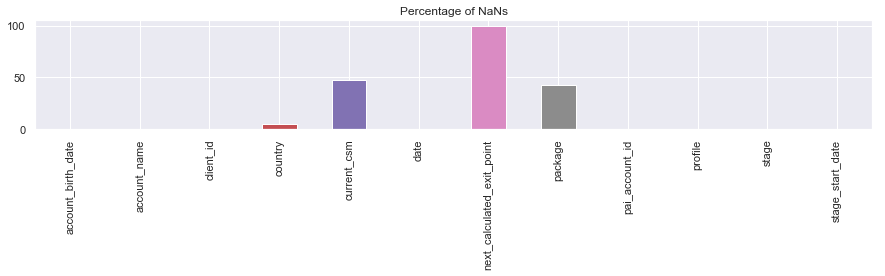

In [14]:
(df.isnull().sum() / len(df) * 100).plot(kind='bar', figsize=(15,2), title='Percentage of NaNs');

Plot of 'noise' in numeric columns - non-zero/null values:

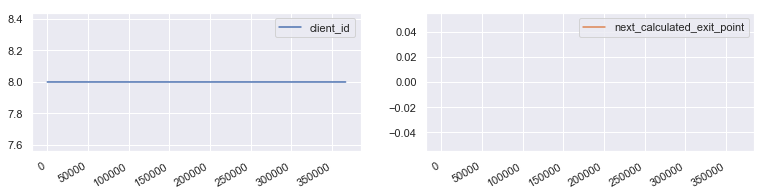

In [15]:
df.select_dtypes(include=['int', 'float']).plot(subplots=True, layout=(9,3), figsize=(20, 30));

`Date_added` is usually (but not always) `date - 1`

In [255]:
diff = (processed.date - processed.date_added).dt.days
(diff != 1.0).sum() / len(diff)

0.21143029531056212

`Created_timestamp` is exactly the same as date

In [318]:
nulls = (pd.isnull(usage) / len(usage)).sum().sort_values(ascending=False).to_dict()
zeros = ((usage == 0) / len(usage)).sum().sort_values(ascending=False).to_dict()

In [ ]:
usage = pd.read_csv('usage.csv')
usage = usage.sort_values(by=['pai_account_id', 'date'])

numeric, few nans, lots of variance

In [16]:
df.describe()[df.describe().index.isin(['min', 'max', 'mean'])]

,client_id,next_calculated_exit_point
mean,8.0,NaN
min,8.0,NaN
max,8.0,NaN


In [302]:
df = df.sort_values(by=['pai_account_id', 'date'])

In [303]:
df = move_columns_to_front(df, ['pai_account_id', 'date'])

In [304]:
df.date = pd.to_datetime(df.date)

In [236]:
df['Conversation status'].value_counts()

Closed    11057
Name: Conversation status, dtype: int64

In [235]:
df['Conversation rating requested'].value_counts()

no     6144
yes    4913
Name: Conversation rating requested, dtype: int64

In [233]:
df.Channel.value_counts()

Desktop    10393
Unknown      604
Email         60
Name: Channel, dtype: int64

In [237]:
df.Type.value_counts()

User    11055
Lead        2
Name: Type, dtype: int64

In [239]:
df['Teammate replies'].value_counts().head()

2    1076
3    1065
4     997
5     873
6     769
Name: Teammate replies, dtype: int64

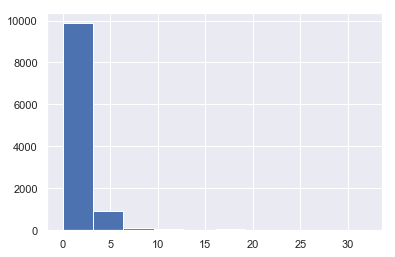

In [248]:
df.Closed.hist();

In [240]:
df.Reopened.value_counts()

0     9945
1      808
2      113
3      105
7       32
10      32
5       11
4       11
Name: Reopened, dtype: int64

In [242]:
df['Inbound/Outbound'].value_counts()

Inbound     10453
Outbound      604
Name: Inbound/Outbound, dtype: int64

In [244]:
df.location.value_counts().head()

Israel            3562
United States     2749
India             1591
United Kingdom     961
Slovenia           418
Name: location, dtype: int64

In [247]:
df.Source.value_counts()

Manual message          339
Visitor auto message    263
User auto message         2
Name: Source, dtype: int64

Notes<br>
Channel + Type are very one-sided, Reopened is 89% 0s, source is 94.5% NaN<br>
What are closed values?
Teammate replies - sum?

In [259]:
df.query("pai_account_id=='0011r00001kSV2X'")

,pai_account_id,date,Channel,client_id,Closed,Conversation rating requested,Conversation status,Inbound/Outbound,last_modified_date,location,profile,Reopened,Source,stage,Teammate replies,Conversation ID,ticket_open_time,ticket_solved_time,Time to first reply (seconds),Time to last close (seconds),Type


In [263]:
matrix = pd.read_csv('fe_matrix_and_target_c7_paying-all_d2019-05-27.csv')

In [273]:
(matrix.iloc[:, 4:-4] == '0').any()

TeammateRepliesFe                              False
ClosedFe                                       False
TicketsOpenedFe                                False
TicketsOpenedFe.conv_rating_requested.no       False
TicketsOpenedFe.conv_rating_requested.yes      False
TicketsOpenedFe.inbound_outbound.Inbound       False
TicketsOpenedFe.inbound_outbound.Outbound      False
TicketsOpenedAndClosedFe                       False
TicketsOpenedAndClosedInSpecialTimeWindowFe    False
TicketsOpenedInSpecialTimeWindowFe             False
dtype: bool

In [278]:
df.ticket_open_time = pd.to_datetime(df.ticket_open_time)
df.ticket_solved_time = pd.to_datetime(df.ticket_solved_time)

In [280]:
df.date.min(), df.date.max()

('2018-01-01', '2018-12-31')

In [277]:
df.head(20)

,channel,client_id,closed,conv_rating_requested,conv_status,date,inbound_outbound,last_modified_date,pai_account_id,profile,reopened,stage,teammate-replies,conv_id,ticket_open_time,ticket_solved_time,time_to_first_reply,time_to_last_close,type
0,Desktop,7,2,no,Closed,2018-01-16,Inbound,2018-01-17 09:38:36,0011r00001l1P78,smb,0,paying,9,14110455732,2018-01-16 15:41:55,2018-01-17 09:38:36,29.0,64601.0,User
1,Desktop,7,2,no,Closed,2018-01-17,Inbound,2018-01-17 09:02:42,0011r00001l1P78,smb,0,paying,21,14118686726,2018-01-17 04:35:49,2018-01-17 09:02:42,60.0,15633.0,User
2,Desktop,7,3,no,Closed,2018-01-30,Inbound,2018-01-30 11:11:36,0011r00001l1P78,smb,1,paying,2,14357886923,2018-01-30 10:06:52,2018-01-30 11:11:36,254.0,3884.0,User
3,Desktop,7,1,no,Closed,2018-02-04,Inbound,2018-02-04 09:51:57,0011r00001l1P78,smb,0,paying,3,14443768114,2018-02-04 09:17:37,2018-02-04 09:51:57,80.0,1784.0,User
4,Desktop,7,4,no,Closed,2018-02-05,Inbound,2018-04-17 08:08:02,0011r00001l1P78,smb,2,paying,5,14454359899,2018-02-05 03:42:09,2018-04-17 08:08:02,327.0,6146753.0,User
5,Desktop,7,1,no,Closed,2018-04-26,Inbound,2018-04-26 07:20:01,0011r00001l1P78,smb,0,paying,2,15987416549,2018-04-26 07:03:48,2018-04-26 07:20:01,96.0,972.0,User
6,Unknown,7,2,no,Closed,2018-02-28,Outbound,2018-02-28 07:29:39,0011r00001l1Tjh,smb,0,paying,4,14904118932,2018-02-28 02:37:23,2018-02-28 07:29:39,779.0,2366.0,User
7,Unknown,7,2,no,Closed,2018-02-28,Outbound,2018-02-28 07:29:39,0011r00001l1Tjh,smb,0,paying,4,14904118932,2018-02-28 02:37:23,2018-02-28 07:29:39,779.0,2366.0,User
8,Unknown,7,2,no,Closed,2018-02-28,Outbound,2018-02-28 07:29:39,0011r00001l1Tjh,smb,0,paying,4,14904118932,2018-02-28 02:37:23,2018-02-28 07:29:39,779.0,2366.0,User
9,Unknown,7,2,no,Closed,2018-02-28,Outbound,2018-02-28 07:29:39,0011r00001l1Tjh,smb,0,paying,4,14904118932,2018-02-28 02:37:23,2018-02-28 07:29:39,779.0,2366.0,User


In [250]:
support.Closed.value_counts()

1     52504
2     16696
3      5910
4      2991
0      1665
5      1517
6       696
7       366
8       182
10      151
9        88
13       82
16       82
12       79
11       70
14       33
19       33
32       32
20       25
24        5
27        4
15        3
37        3
17        1
18        1
22        1
31        1
Name: Closed, dtype: int64

In [212]:
nulls = (df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)
nulls[nulls > 0]

Source                           94.537397
location                          5.607308
Time to first reply (seconds)     3.346296
Time to last close (seconds)      1.157638
dtype: float64

In [32]:
old_usage = pd.read_csv('APPSFLYER_cleaned_usage_APPSFLYER.csv')
old_usage = old_usage.sort_values(by=['date'])
old_usage = old_usage[sorted(list(old_usage))]

/Users/joshfriedlander/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10,29,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
